# Figures Gretsi 2025

Codes pour générer les figures de l'article soumis à Gretsi 2025.

Author: G. Becq  
Date: 2025-03-28

In [47]:
import numpy as np
import tools
from importlib import reload
from matplotlib import pyplot as plt
import os

In [48]:
if not os.path.exists("./fig"): 
    os.makedirs("./fig")

# Figure 1

On trace les densités de probabilité théoriques et estimées par simulation pour différentes valeurs du nombre d'échantillons. 

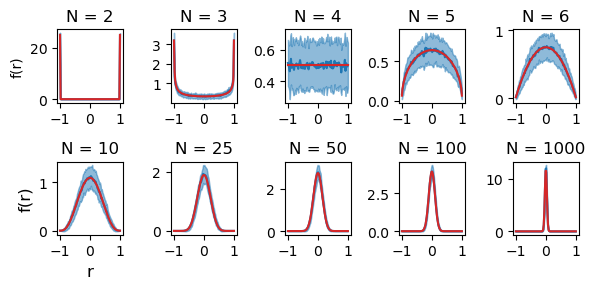

In [49]:
fig, axs = tools.plt.subplots(2, 5, figsize=(6, 3))
settings = {"fontsize": 12}
tools.plot_fr(2, ax=axs[0, 0], ylabel=True)
axs[0, 0].set_title("N = 2", **settings)
tools.plot_fr(3, ax=axs[0, 1])
axs[0, 1].set_title("N = 3", **settings)
tools.plot_fr(4, ax=axs[0, 2])
axs[0, 2].set_title("N = 4", **settings)
tools.plot_fr(5, ax=axs[0, 3])
axs[0, 3].set_title("N = 5", **settings)
tools.plot_fr(6, ax=axs[0, 4])
axs[0, 4].set_title("N = 6", **settings)
tools.plot_fr(10, ax=axs[1, 0], xlabel=True, ylabel=True, **settings)
axs[1, 0].set_title("N = 10", **settings)
tools.plot_fr(25, ax=axs[1, 1])
axs[1, 1].set_title("N = 25", **settings)
tools.plot_fr(50, ax=axs[1, 2])
axs[1, 2].set_title("N = 50", **settings)
tools.plot_fr(100, ax=axs[1, 3])
axs[1, 3].set_title("N = 100", **settings)
tools.plot_fr(1000, ax=axs[1, 4])
axs[1, 4].set_title("N = 1000", **settings)
fig.tight_layout()
fig.savefig("./fig/fig1.jpg", dpi=300)

# Figure 2 

On trace le seuil de corrélation significatives $r^*$ : 
- pour des valeurs théoriques.
- pour des valeurs empiriques obtenues par simulation. 
- pour des valeurs obtenues en utilisant la loi normale approchée en utilisant une transformation de Fisher. 

....

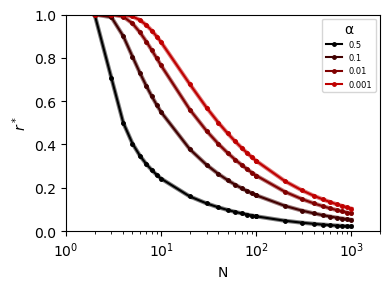

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
alphas = [0.5, 0.1, 0.01, 0.001]
for (i, alpha) in enumerate(alphas): 
    print(".", end="")
    (N, Rho) = tools.get_curve_rho(alpha)
    ax.semilogx(N, Rho, "-", linewidth=3, alpha=0.5, color=(i/4, 0, 0))
    ax.semilogx(N, Rho, ".-", markersize=5, label=str(alpha), color=(i/4, 0, 0))
plt.axis([1, 2000, 0, 1])
ax.legend(fontsize=6, title="α")
plt.xlabel("N")
plt.ylabel("$r^*$")
fig.tight_layout()
plt.savefig("./fig/fig2_a.jpg", dpi=300)

....

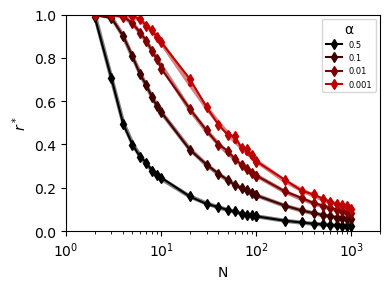

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
alphas = [0.5, 0.1, 0.01, 0.001]
for (i, alpha) in enumerate(alphas): 
    print(".", end="")
    (N, Rho) = tools.get_curve_rho(alpha)
    ax.semilogx(N, Rho, "-", linewidth=3, alpha=0.5, color=(i/4, 0, 0))
    ax.semilogx(N, Rho, ".", markersize=5, color=(i/4, 0, 0))
    (N, Rho) = tools.get_curve_rho_exp(alpha, 200)
    ax.semilogx(N, Rho, "d-", markersize=5, 
                alpha=1, label=str(alpha), color=(i/4, 0, 0))
plt.axis([1, 2000, 0, 1])
ax.legend(fontsize=6, title="α")
plt.xlabel("N")
plt.ylabel("$r^*$")
fig.tight_layout()
plt.savefig("./fig/fig2_b.jpg", dpi=300)

In [52]:
reload(tools.sigcor.core)
reload(tools)

<module 'tools' from '/home/becqg/Documents/dynasti/doc/20250314_gretsi/code/tools.py'>

....

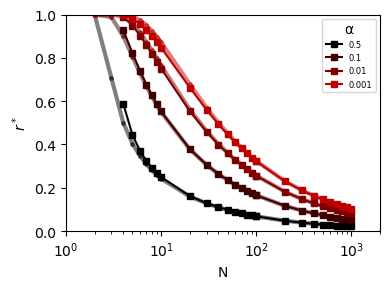

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
alphas = [0.5, 0.1, 0.01, 0.001]
for (i, alpha) in enumerate(alphas): 
    print(".", end="")
    (N, Rho) = tools.get_curve_rho(alpha)
    ax.semilogx(N, Rho, "-", linewidth=3, alpha=0.5, 
                color=(i/4, 0, 0))
    ax.semilogx(N, Rho, ".", markersize=5, alpha=0.5, color=(i/4, 0, 0))
    (N, Rho) = tools.get_curve_rho_fisher(alpha)
    ax.semilogx(N, Rho, "s-", markersize=5, label=str(alpha), 
                alpha=1, color=(i/4, 0, 0))
plt.axis([1, 2000, 0, 1])
ax.legend(fontsize=6, title="α")
plt.xlabel("N")
plt.ylabel("$r^*$")
fig.tight_layout()
plt.savefig("./fig/fig2_c.jpg", dpi=300)

# Figure 3

Effet du filtrage sur rs, valeur seuil pour les corrélations significatives. 

On part de $F_s = 1$ Hz. 
On utilise une décomposition $B^k = F_s / 2^{k} = \kappa F_s / 2$ Hz pour mettre en évidence les effets du filtrages, avec $\kappa = 1 / a$, qui correspond au ratio de la bande spectrale totale intiale du signal. 
Ces bandes de fréquences sont celles obtenues lorsqu'on utilise des décompositions par ondelettes dyadiques aux différentes échelles $a = 2^{k - 1}, k \in \mathbb{N}^*$.  

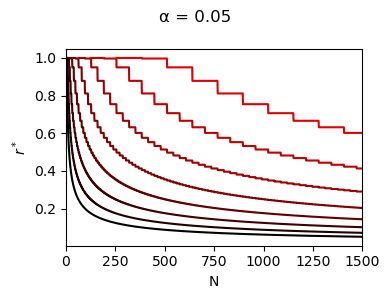

In [54]:
fig = tools.plot_rs_filtered(0.05, 1500, 8,has_legend=False) 
fig.savefig("./fig/fig3_a.jpg", dpi=300)

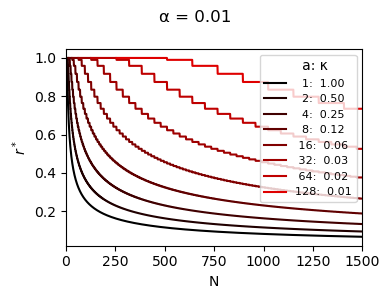

In [55]:
fig = tools.plot_rs_filtered(0.01, 1500, 8) 
fig.savefig("./fig/fig3_b.jpg", dpi=300)

## figure 4

On donne deux exemples pour retrouver les valeurs proposées sur les tracés disponibles dans [david1938] pour une valeur de corrélation entre variables nulles $ρ = 0$.

Les tracés obtenus avec `sigcor` sont coupées et superposés avec une transparence de 25 %, après redimensionnement proportionnel, aux tracés disponibles dans [david1938].   

In [56]:
N = [3, 4, 5, 6, 7, 8, 10, 12, 15, 20, 25, 50, 100, 200, 400]
nN = len(N)
r = tools.np.zeros((nN, ))
for i in range(nN): 
    r[i] = tools.sigcor.get_rs(N[i], 0.05, twosided=True)

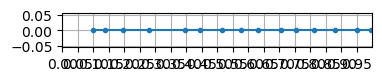

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
ax.plot(r, r * 0, '.-')
ax.axis(xmin=0, xmax=1)
ax.set_xticks(tools.np.arange(0, 1, 0.05))
ax.grid("on")
ax.set_aspect("equal")
fig.savefig("./fig/fig4_a.jpg", dpi=300)

In [58]:
N = [3, 4, 5, 6, 7, 8, 10, 12, 15, 20, 25, 50, 100, 200, 400]
nN = len(N)
r = tools.np.zeros((nN, ))
for i in range(nN): 
    r[i] = tools.sigcor.get_rs(N[i], 0.10, twosided=True)

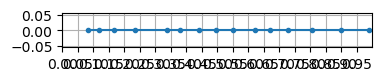

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
ax.plot(r, r * 0, '.-')
ax.axis(xmin=0, xmax=1)
ax.set_xticks(tools.np.arange(0, 1, 0.05))
ax.grid("on")
ax.set_aspect("equal")
fig.savefig("./fig/fig4_b.jpg", dpi=300)